In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original = cv2.imread("1.jpg")  # Replace with the path to your image

1 First Values: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

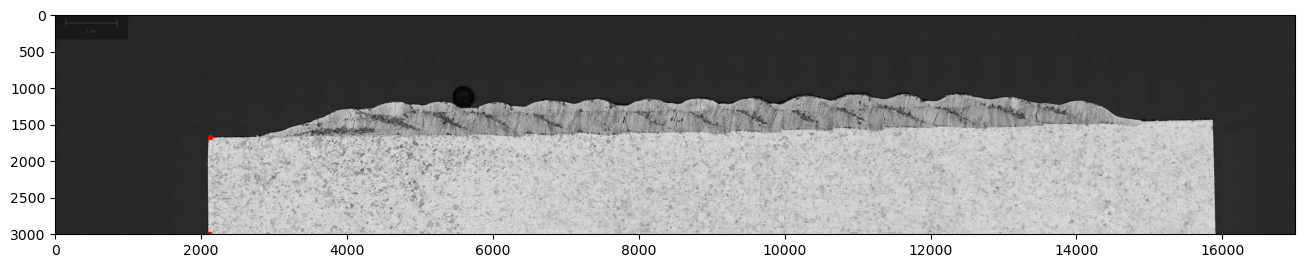

In [3]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 First Values:", first_values)
print("2 Coordinates:", coordinates)
num_first_values = len(first_values)
print("3 First Values Number Count:", num_first_values)
num_coordinates_count = len(coordinates)
print("4 Coordinates Number Count:", num_coordinates_count)
print("5 X Local Value:", first_values_x_local)
print("6 X Global Value:", first_values_x_global)
print("7 Y Global Value:", first_values_y_global)
print("8 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=0.1, color='red')
plt.imshow(image, cmap='gray')

Global Coordinates: [(2118, 1671), (2115, 1672), (2115, 1673), (2115, 1674), (2114, 1675), (2113, 1676), (2113, 1677), (2112, 1678), (2112, 1679), (2111, 1680), (2111, 1681), (2111, 1682), (2111, 1683), (2111, 1684), (2110, 1685), (2110, 1686), (2110, 1687), (2110, 1688), (2110, 1689), (2110, 1690), (2110, 1691), (2110, 1692), (2110, 1693), (2111, 1694), (2111, 1695), (2110, 1696), (2109, 1697), (2109, 1698), (2109, 1699), (2109, 1700), (2109, 1701), (2109, 1702), (2109, 1703), (2108, 1704), (2107, 1705), (2107, 1706), (2107, 1707), (2107, 1708), (2107, 1709), (2106, 1710), (2106, 1711), (2108, 1712), (2108, 1713), (2107, 1714), (2107, 1715), (2107, 1716), (2106, 1717), (2105, 1718), (2105, 1719), (2105, 1720), (2105, 1721), (2105, 1722), (2105, 1723), (2105, 1724), (2104, 1725), (2104, 1726), (2104, 1727), (2104, 1728), (2104, 1729), (2105, 1730), (2105, 1731), (2105, 1732), (2105, 1733), (2105, 1734), (2104, 1735), (2104, 1736), (2104, 1737), (2104, 1738), (2103, 1739), (2104, 1740),

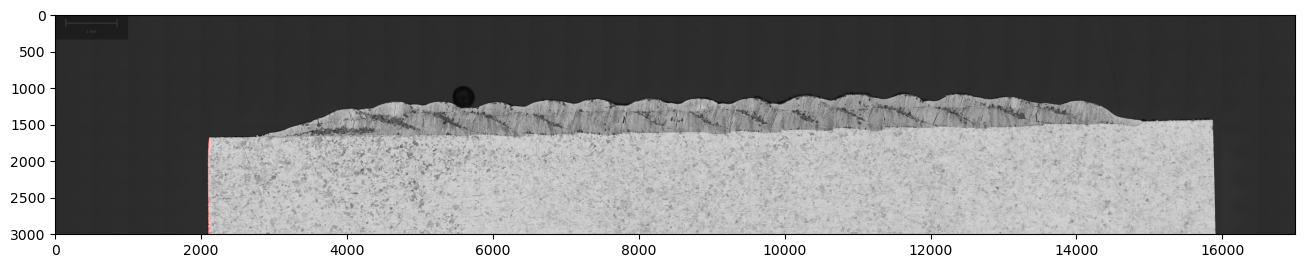

In [4]:
image_original = cv2.imread('1.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 30, 180)

# Find the upper boundary coordinates
coordinates = []
for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

1 Coordinates: [(50, 124), (41, 133), (66, 134), (69, 135), (71, 136), (72, 137), (72, 138), (72, 139), (72, 140), (72, 141), (72, 142), (72, 143), (73, 144), (73, 145), (73, 146), (73, 147), (73, 148), (73, 149), (73, 150), (73, 151), (73, 152), (73, 153), (73, 154), (73, 155), (73, 156), (73, 157), (73, 158), (73, 159), (73, 160), (73, 161), (73, 162), (73, 163), (73, 164), (73, 165), (73, 166), (73, 167), (73, 168), (73, 169), (74, 170), (74, 171), (74, 172), (74, 173), (74, 174), (74, 175), (74, 176), (74, 177), (74, 178), (74, 179), (74, 180), (74, 181), (74, 182), (74, 183), (74, 184), (74, 185), (74, 186), (74, 187), (74, 188), (74, 189), (74, 190), (74, 191), (74, 192), (74, 193), (74, 194), (74, 195), (74, 196), (75, 197), (75, 198), (75, 199), (75, 200), (75, 201), (75, 202), (75, 203), (75, 204), (75, 205), (75, 206), (75, 207), (75, 208), (75, 209), (75, 210), (75, 211), (75, 212), (75, 213), (75, 214), (75, 215), (75, 216), (75, 217), (75, 218), (75, 219), (75, 220), (75, 

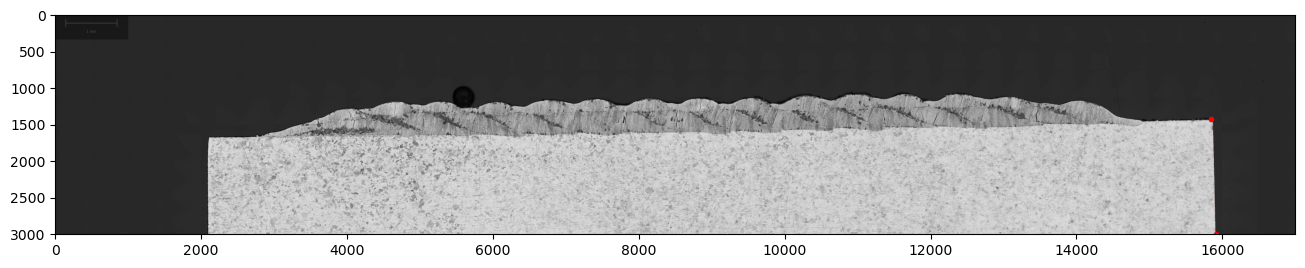

In [5]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 15800, 16000
y_start, y_end = 1300, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
selected_coordinates = []
coordinates = []
first_values = []
coord = []

# Iterate through the image array in reverse order along the x-axis
for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]-1, -1, -1):
        if selected_portions[y, x] > threshold and y > threshold: 
            coordinates.append((x, y))
            selected_coordinates.append((x, y))
            break

coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 Coordinates:", coordinates)
print("2 X Local Value:", first_values_x_local)
print("3 X Global Value:", first_values_x_global)
print("4 Y Global Value:", first_values_y_global)
print("5 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=0.1, color='red')
plt.imshow(image, cmap='gray')


Global Coordinates: [(15842, 1412), (15845, 1413), (15846, 1414), (15851, 1415), (15851, 1416), (15850, 1417), (15855, 1418), (15854, 1419), (15855, 1420), (15855, 1421), (15855, 1422), (15855, 1423), (15854, 1424), (15856, 1425), (15856, 1426), (15856, 1427), (15857, 1428), (15857, 1429), (15859, 1430), (15849, 1431), (15865, 1433), (15869, 1434), (15872, 1435), (15872, 1436), (15872, 1437), (15873, 1438), (15873, 1439), (15873, 1440), (15873, 1441), (15873, 1442), (15873, 1443), (15873, 1444), (15873, 1445), (15873, 1446), (15873, 1447), (15873, 1448), (15873, 1449), (15873, 1450), (15873, 1451), (15873, 1452), (15873, 1453), (15873, 1454), (15874, 1455), (15874, 1456), (15873, 1457), (15873, 1458), (15874, 1459), (15874, 1460), (15873, 1461), (15873, 1462), (15873, 1463), (15873, 1464), (15873, 1465), (15873, 1466), (15874, 1467), (15874, 1468), (15874, 1469), (15874, 1470), (15874, 1471), (15874, 1472), (15874, 1473), (15874, 1474), (15874, 1475), (15874, 1476), (15874, 1477), (158

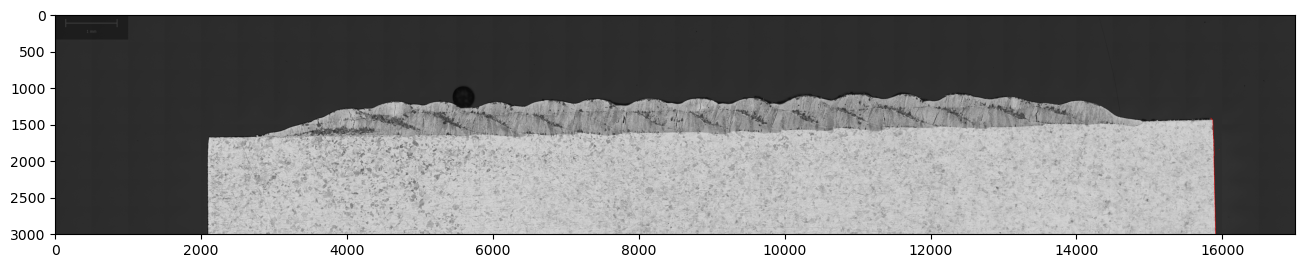

In [6]:
image_original = cv2.imread('1.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 15800, 16000
y_start, y_end = 1300, -1

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 140)

# Find the upper boundary coordinates
coordinates = []
for y in range(edges.shape[0]):
    for x in range(edges.shape[1] - 1, -1, -1):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

Global Coordinates: [(2116, 1671), (2117, 1671), (2118, 1671), (2119, 1671), (2120, 1671), (2121, 1671), (2122, 1672), (2123, 1671), (2124, 1671), (2125, 1671), (2223, 1672), (2224, 1672), (2225, 1672), (2226, 1672), (2227, 1671), (2228, 1671), (2229, 1672), (2230, 1672), (2235, 1669), (2236, 1669), (2237, 1669), (2238, 1669), (2239, 1669), (2240, 1670), (2241, 1670), (2242, 1672), (2243, 1671), (2244, 1671), (2263, 1672), (2264, 1671), (2265, 1671), (2266, 1672), (2267, 1672), (2268, 1672), (2269, 1672), (2270, 1672), (2271, 1672), (2272, 1672), (2273, 1671), (2274, 1671), (2275, 1671), (2276, 1671), (2277, 1671), (2278, 1671), (2279, 1671), (2280, 1671), (2281, 1671), (2282, 1671), (2283, 1671), (2284, 1671), (2285, 1671), (2286, 1671), (2287, 1671), (2288, 1671), (2289, 1671), (2290, 1671), (2291, 1671), (2292, 1672), (2293, 1671), (2294, 1672), (2295, 1672), (2296, 1671), (2297, 1671), (2298, 1671), (2299, 1671), (2300, 1671), (2301, 1671), (2302, 1671), (2303, 1672), (2304, 1672),

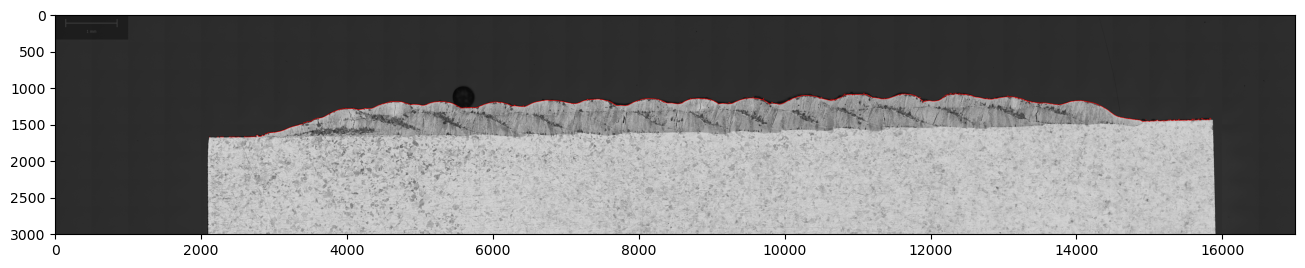

In [7]:
image_original = cv2.imread('1.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 2116, 15850
y_start, y_end = 1000, 1673

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 150)

# Find the upper boundary coordinates
coordinates = []
for x in range(edges.shape[1]):
    for y in range(edges.shape[0]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

8 Global Value: [(2794, 1689), (2791, 1690), (2790, 1691), (2790, 1692), (2789, 1693), (2789, 1694), (2789, 1695), (2788, 1696), (2787, 1697), (2787, 1698), (2786, 1699), (2786, 1700), (2786, 1701), (2786, 1702), (2785, 1703), (2785, 1704), (2785, 1705), (2786, 1706), (2786, 1707), (2785, 1708), (2785, 1709), (2785, 1710), (2785, 1711), (2786, 1712), (2786, 1713), (2786, 1714), (2785, 1715), (2785, 1716), (2785, 1717), (2784, 1718), (2784, 1719), (2784, 1720), (2783, 1721), (2783, 1722), (2782, 1723), (2782, 1724), (2782, 1725), (2782, 1726), (2782, 1727), (2782, 1728), (2782, 1729), (2782, 1730), (2783, 1731), (2783, 1732), (2782, 1733), (2781, 1734), (2781, 1735), (2781, 1736), (2781, 1737), (2781, 1738), (2781, 1739), (2781, 1740), (2780, 1741), (2780, 1742), (2780, 1743), (2779, 1744), (2779, 1745), (2779, 1746), (2779, 1747), (2780, 1748), (2780, 1749), (2780, 1750), (2780, 1751), (2780, 1752), (2779, 1753), (2779, 1754), (2779, 1755), (2779, 1756), (2779, 1757), (2779, 1758), (27

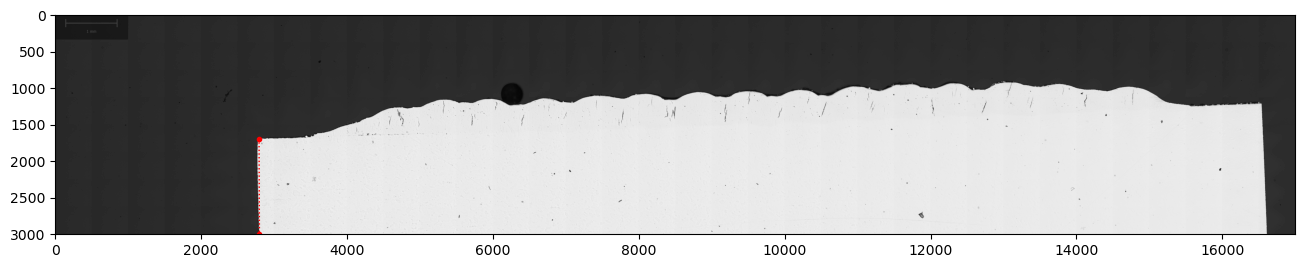

In [8]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2670, 2870
y_start, y_end = 1500, -1

threshold = 110

selected_portions = gray_image[y_start:y_end, x_start:x_end]

#flattened_arr = selected_portions.reshape(-1, 3)
coordinates = []
first_values = []

# Iterate over each pixel in the flattened array
for y, row in enumerate(selected_portions):
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            break
    else:
        first_values.append(None)
        coordinates.append(None)

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

#print("Selected Coordinates:", coordinates)
#print("5 X Local Value:", first_values_x_local)
#print("6 X Global Value:", first_values_x_global)
print("8 Global Value:", global_coordinates)
num_coordinates_count = len(coordinates)
#print("4 Coordinates Number Count:", num_coordinates_count)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(gray_image, cmap='gray')

Global Coordinates: [(2792, 1685), (2792, 1686), (2792, 1687), (2792, 1688), (2791, 1689), (2790, 1690), (2789, 1691), (2789, 1692), (2788, 1693), (2788, 1694), (2788, 1695), (2787, 1696), (2786, 1697), (2786, 1698), (2786, 1699), (2785, 1700), (2785, 1701), (2785, 1702), (2785, 1703), (2785, 1704), (2785, 1705), (2785, 1706), (2785, 1707), (2785, 1708), (2785, 1709), (2785, 1710), (2785, 1711), (2785, 1712), (2785, 1713), (2785, 1714), (2785, 1715), (2784, 1716), (2784, 1717), (2784, 1718), (2784, 1719), (2783, 1720), (2783, 1721), (2782, 1722), (2782, 1723), (2782, 1724), (2781, 1725), (2781, 1726), (2781, 1727), (2781, 1728), (2781, 1729), (2782, 1730), (2777, 1731), (2777, 1732), (2777, 1733), (2777, 1734), (2777, 1735), (2778, 1736), (2780, 1737), (2780, 1738), (2780, 1739), (2780, 1740), (2780, 1741), (2780, 1742), (2779, 1743), (2779, 1744), (2779, 1745), (2779, 1746), (2779, 1747), (2779, 1748), (2779, 1749), (2780, 1750), (2779, 1751), (2779, 1752), (2779, 1753), (2779, 1754),

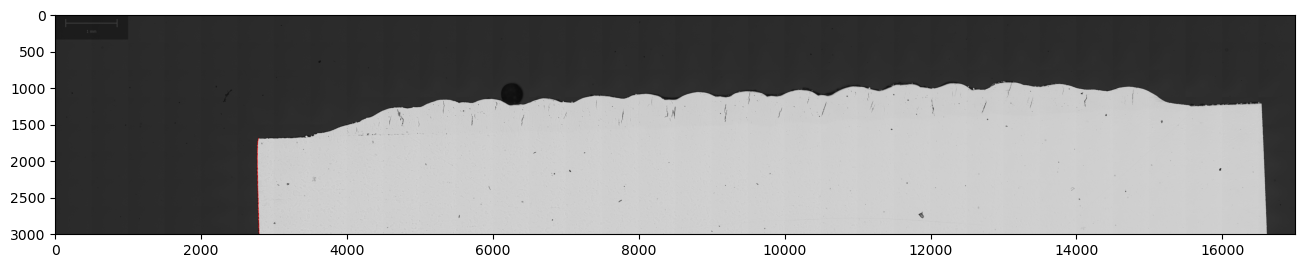

In [9]:
image_original = cv2.imread('2.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2670, 2870
y_start, y_end = 1500, -1

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 30, 180)

# Find the upper boundary coordinates
coordinates = []
for y in range(edges.shape[0]):
    for x in range(edges.shape[1]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

8 Global Value: [(16527, 1211), (16537, 1212), (16539, 1213), (16540, 1214), (16540, 1215), (16541, 1216), (16541, 1217), (16541, 1218), (16541, 1219), (16541, 1220), (16541, 1221), (16541, 1222), (16542, 1223), (16542, 1224), (16542, 1225), (16542, 1226), (16542, 1227), (16542, 1228), (16542, 1229), (16542, 1230), (16542, 1231), (16542, 1232), (16542, 1233), (16542, 1234), (16542, 1235), (16542, 1236), (16542, 1237), (16543, 1238), (16543, 1239), (16543, 1240), (16543, 1241), (16543, 1242), (16543, 1243), (16543, 1244), (16543, 1245), (16543, 1246), (16543, 1247), (16543, 1248), (16543, 1249), (16543, 1250), (16543, 1251), (16543, 1252), (16543, 1253), (16543, 1254), (16543, 1255), (16543, 1256), (16543, 1257), (16543, 1258), (16543, 1259), (16543, 1260), (16543, 1261), (16544, 1262), (16544, 1263), (16544, 1264), (16544, 1265), (16544, 1266), (16544, 1267), (16544, 1268), (16544, 1269), (16544, 1270), (16544, 1271), (16544, 1272), (16544, 1273), (16544, 1274), (16544, 1275), (16544, 

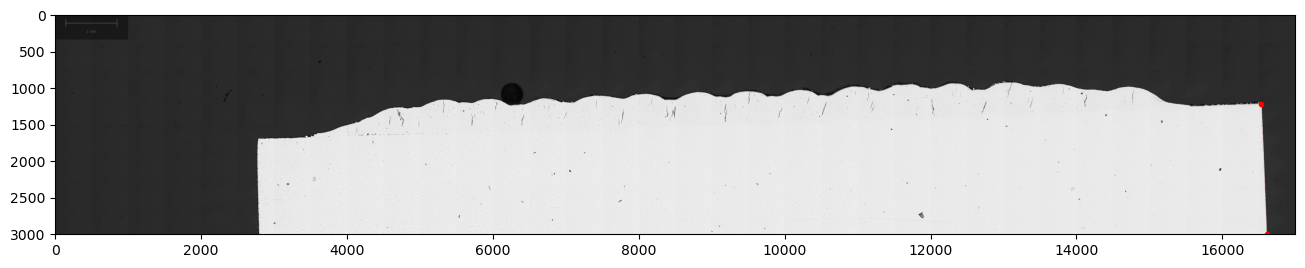

In [10]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 16440, 16740
y_start, y_end = 1100, -1

threshold = 110
selected_portions = gray_image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []

for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]-1, -1, -1):
        value = selected_portions[y, x]
        if value > threshold and y > threshold:
            coordinates.append((x, y))
            # Assuming you also want to append the value to first_values
            first_values.append(value)
            break

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

#print("Selected Coordinates:", coordinates)
#print("5 X Local Value:", first_values_x_local)
#print("6 X Global Value:", first_values_x_global)
print("8 Global Value:", global_coordinates)
num_coordinates_count = len(coordinates)
#print("4 Coordinates Number Count:", num_coordinates_count)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=0.1, color='red')
plt.imshow(gray_image, cmap='gray')

Global Coordinates: [(16510, 1190), (16511, 1191), (16518, 1192), (16521, 1193), (16522, 1194), (16523, 1195), (16523, 1196), (16523, 1197), (16523, 1198), (16524, 1199), (16523, 1200), (16522, 1201), (16521, 1202), (16521, 1203), (16519, 1204), (16518, 1205), (16517, 1206), (16508, 1207), (16503, 1208), (16538, 1209), (16517, 1210), (16534, 1211), (16540, 1212), (16541, 1213), (16541, 1214), (16541, 1215), (16541, 1216), (16541, 1217), (16541, 1218), (16541, 1219), (16541, 1220), (16541, 1221), (16541, 1222), (16541, 1223), (16542, 1224), (16542, 1225), (16542, 1226), (16542, 1227), (16542, 1228), (16542, 1229), (16542, 1230), (16542, 1231), (16542, 1232), (16542, 1233), (16542, 1234), (16542, 1235), (16543, 1236), (16543, 1237), (16543, 1238), (16543, 1239), (16543, 1240), (16543, 1241), (16543, 1242), (16543, 1243), (16543, 1244), (16543, 1245), (16543, 1246), (16543, 1247), (16543, 1248), (16543, 1249), (16543, 1250), (16543, 1251), (16543, 1252), (16543, 1253), (16544, 1254), (165

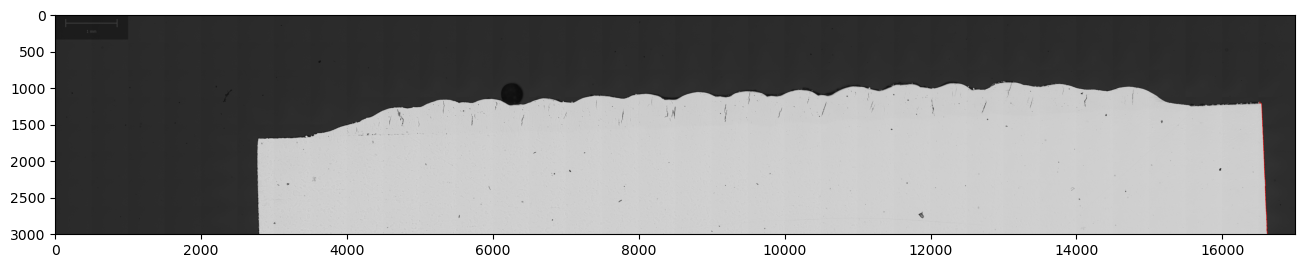

In [11]:
image_original = cv2.imread('2.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 16440, 16740
y_start, y_end = 1100, -1

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 140)

# Find the upper boundary coordinates
coordinates = []
for y in range(edges.shape[0]):
    for x in range(edges.shape[1] - 1, -1, -1):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

Global Coordinates: [(2794, 1686), (2795, 1687), (2796, 1687), (2797, 1688), (2798, 1688), (2799, 1687), (2895, 1688), (2896, 1688), (2897, 1688), (2898, 1687), (2899, 1686), (2900, 1687), (2901, 1687), (2902, 1680), (2903, 1680), (2904, 1680), (2905, 1680), (2906, 1680), (2907, 1680), (2908, 1680), (2909, 1680), (2910, 1680), (2911, 1680), (2912, 1680), (2913, 1679), (2914, 1679), (2915, 1679), (2916, 1680), (2917, 1680), (2918, 1680), (2919, 1680), (2935, 1687), (2936, 1688), (2937, 1688), (2938, 1688), (2939, 1688), (2940, 1687), (2941, 1687), (2942, 1687), (2943, 1687), (2944, 1687), (2945, 1687), (2946, 1687), (2947, 1687), (2948, 1687), (2949, 1687), (2950, 1687), (2951, 1687), (2952, 1687), (2953, 1687), (2954, 1687), (2955, 1687), (2956, 1687), (2957, 1687), (2958, 1687), (2959, 1687), (2960, 1687), (2961, 1687), (2962, 1687), (2963, 1687), (2964, 1687), (2965, 1687), (2966, 1687), (2967, 1687), (2968, 1687), (2969, 1687), (2970, 1687), (2971, 1686), (2972, 1686), (2973, 1686),

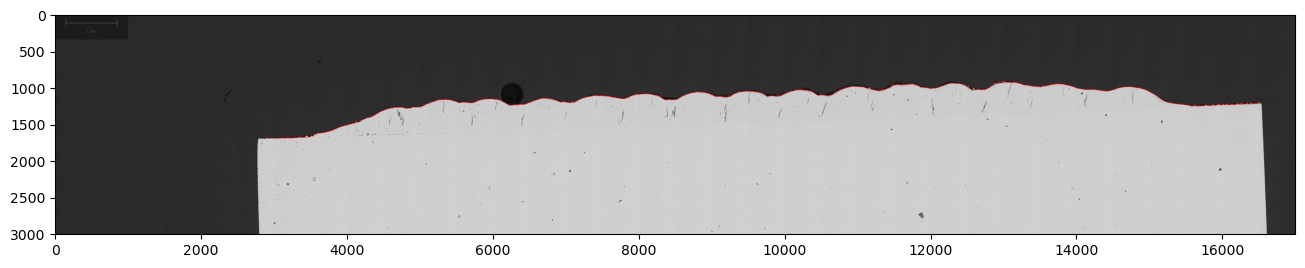

In [12]:
image_original = cv2.imread('2.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 2794, 16527
y_start, y_end = 700, 1689

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 150)

# Find the upper boundary coordinates
coordinates = []
for x in range(edges.shape[1]):
    for y in range(edges.shape[0]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb2.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

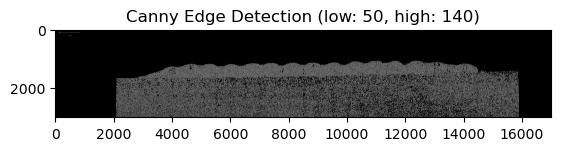

In [13]:

image_original = cv2.imread('1.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

low_threshold = 50
high_threshold = 140

# Apply edge detection
edges = cv2.Canny(image, low_threshold, high_threshold)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title(f'Canny Edge Detection (low: {low_threshold}, high: {high_threshold})')
plt.show()

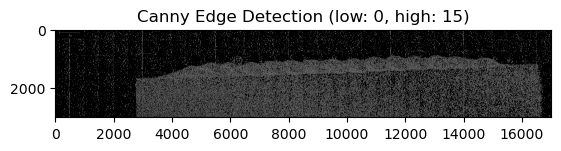

In [14]:

image_original = cv2.imread('2.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

low_threshold = 0
high_threshold = 15

# Apply edge detection
edges = cv2.Canny(image, low_threshold, high_threshold)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title(f'Canny Edge Detection (low: {low_threshold}, high: {high_threshold})')
plt.show()